# Hybrid ARIMA - SVM Model (THIS IS THE CORRECT ONE)

***

#### Package Imports

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

***

#### Loading and Processing the data

In [97]:
# Oil price data
oil_df = pd.read_csv('Full_crude_oil_data.csv', index_col = 'Date')
oil_df.drop({'Unnamed: 0'}, inplace = True, axis = 1)

# Sentiment data
sentiment_df = pd.read_csv('Tweet_Sentiment_Per_Day.csv', index_col = 'Date')
sentiment_df.drop({'Unnamed: 0'}, inplace = True, axis = 1)
sentiment_df.index = pd.to_datetime(sentiment_df.index)
sentiment_df = sentiment_df.sort_index()

***

<AxesSubplot:xlabel='Date'>

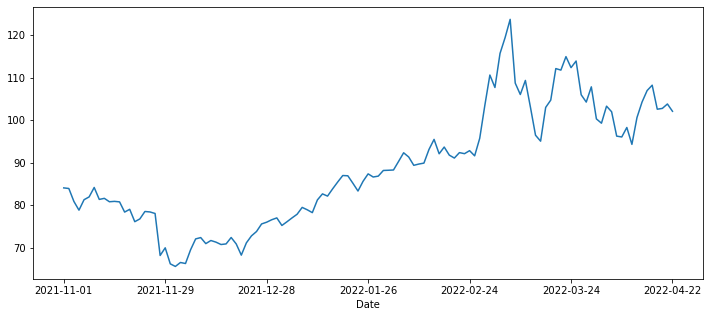

In [107]:
# Oil price graph
oil_df['Close'].plot(figsize=(12,5))

<AxesSubplot:>

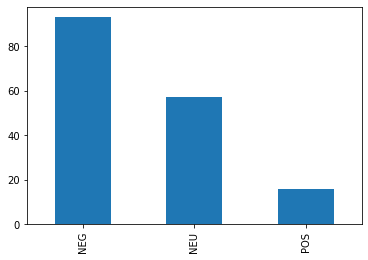

In [108]:
# Value counts for each sentiment
sentiment_freq = sentiment_df['Sentiment'].value_counts()
sentiment_freq.plot.bar()

In [109]:
# Get sentiment score from sentiment
def sentiment_score(Sentiment):
    if(Sentiment == 'POS'):
        return 1
    if(Sentiment == 'NEU'):
        return 0
    if(Sentiment == 'NEG'):
        return -1

# add a new column 'sentimentScore' to sentiment_df    
for i, r in sentiment_df.iterrows():
    sentiment_df.loc[i, ['sentimentScore']] = sentiment_score(r['Sentiment'])

sentiment_df    

,Sentiment,sentimentScore
Date,,
2021-10-31,NEG,-1.0
2021-11-02,POS,1.0
2021-11-03,NEU,0.0
2021-11-04,NEG,-1.0
2021-11-05,NEU,0.0
...,...,...
2022-04-19,NEG,-1.0
2022-04-20,NEG,-1.0
2022-04-21,NEG,-1.0


<AxesSubplot:xlabel='Date'>

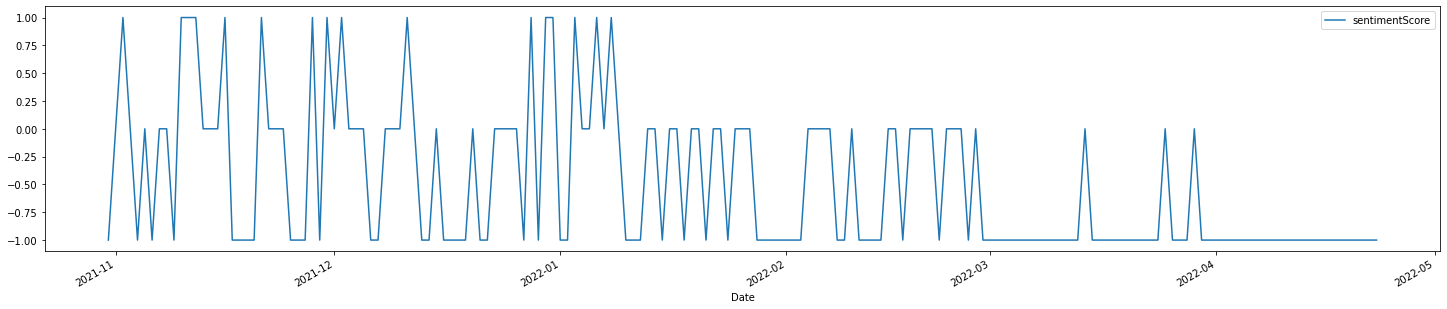

In [114]:
sentiment_df.plot(figsize = (25, 5))

In [115]:
from platform import python_version
print(python_version())

3.8.12
